## Trabalho de LPA

import da bibliotecas

In [208]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import  XGBRegressor
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

### Analise Exploratória de dados

a. Carregue a base de dados **precos_carros_brasil.csv**

In [209]:
dados = pd.read_csv('precos_carros_brasil.csv')
dados.columns

/root/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['year_of_reference', 'month_of_reference', 'fipe_code',
       'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl'],
      dtype='object')

b. Verifique se há valores faltantes nos dados. Caso haja, escolha uma tratativa para
resolver o problema de valores faltantes


In [210]:
# Verifica quais colunas possuem valores nulos
dados.isna().any()

year_of_reference     True
month_of_reference    True
fipe_code             True
authentication        True
brand                 True
model                 True
fuel                  True
gear                  True
engine_size           True
year_model            True
avg_price_brl         True
dtype: bool

In [211]:
# Verifica quantas linhas estão vazias por coluna
dados.isna().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

In [212]:
# Verifica quantas linhas e colunas existem na base de dados
dados.shape

(267542, 11)

Como existem diversas LINHAS sem dados para todas as colunas, faz sentido exclui-las
para que isso não afete a análise. Para excluir tais linhas pode-se usar a função
``dropna()`` escolhendo qualquer coluna como referência

In [213]:
dados.dropna(subset=['brand'], inplace=True)
#Verificando se ainda existem valores vazios na base de dados
dados.isna().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64

In [214]:
dados.shape

(202297, 11)

c. Verifique se há dados duplicados nos dados

In [215]:
print(dados.duplicated().sum())
dados[dados.duplicated(keep=False)]

2


,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
45791,2021.0,June,025232-8,5rtdwkpkpq5h,Renault,DUSTER OROCH Dyna. 2.0 Flex 16V Mec.,Gasoline,manual,2,2018.0,69893.0
45793,2021.0,June,025232-8,5rtdwkpkpq5h,Renault,DUSTER OROCH Dyna. 2.0 Flex 16V Mec.,Gasoline,manual,2,2018.0,69893.0
189895,2022.0,December,003296-4,3r6c277cnqcb,Ford,Ranger Limited 3.0 PSE 4x4 CD TB Diesel,Diesel,manual,3,2007.0,64638.0
189896,2022.0,December,003296-4,3r6c277cnqcb,Ford,Ranger Limited 3.0 PSE 4x4 CD TB Diesel,Diesel,manual,3,2007.0,64638.0


In [216]:
#  Removendo os dados duplicados
dados.drop_duplicates(inplace=True)
dados.shape

(202295, 11)

d. Crie duas categorias, para separar colunas numéricas e categóricas. Imprima o resumo
de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)

In [217]:
# Verificando os tipos de cada coluna
dados.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

In [218]:
# Separando a base de dados em duas categorias
dados['year_of_reference'] = dados['year_of_reference'].astype(int)
dados['year_model'] = dados['year_model'].astype(int)
dados.dtypes
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']
dados[numericas_cols].describe()

,year_of_reference,year_model,avg_price_brl
count,202295.000000,202295.000000,202295.000000
mean,2021.564695,2011.271514,52756.765713
std,0.571904,6.376241,51628.912116
min,2021.000000,2000.000000,6647.000000
25%,2021.000000,2006.000000,22855.000000
50%,2022.000000,2012.000000,38027.000000
75%,2022.000000,2016.000000,64064.000000
max,2023.000000,2023.000000,979358.000000


In [219]:
dados[categoricas_cols].describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202295,202295,202295,202295,202295,202295,202295,202295
unique,12,2091,202295,6,2112,3,2,29
top,January,003281-6,cfzlctzfwrcp,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,1,44962,425,168684,161883,47420


e. Imprima a contagem de valores por modelo (model) e marca do carro (brand)

In [220]:
# imprimindo a contagem de valores por modelo
dados['model'].value_counts()

Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Saveiro Robust 1.6 Total Flex 16V CD        2
Saveiro Robust 1.6 Total Flex 16V           2
Gol Last Edition 1.0 Flex 12V 5p            2
Polo Track 1.0 Flex 12V 5p                  2
Name: model, Length: 2112, dtype: int64

In [221]:
# imprimindo a contagem de valores por marca
dados['brand'].value_counts()

Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: brand, dtype: int64

f. Dê um breve explicação (máximo de quatro linhas) sobre os principais resultados
encontrados na Análise Exploratória dos dados

R: A análise exploratória revelou que a marca mais com mais carros na base de dados é a
Fiat e com o modelo Palio Week, além disso foi possível identificar que a média dos
preços dos carros populares no Brasil é aproximadamente ~R$52700

### Visualização dos dados

a. Gere um gráfico da distribuição da quantidade de carros por marca

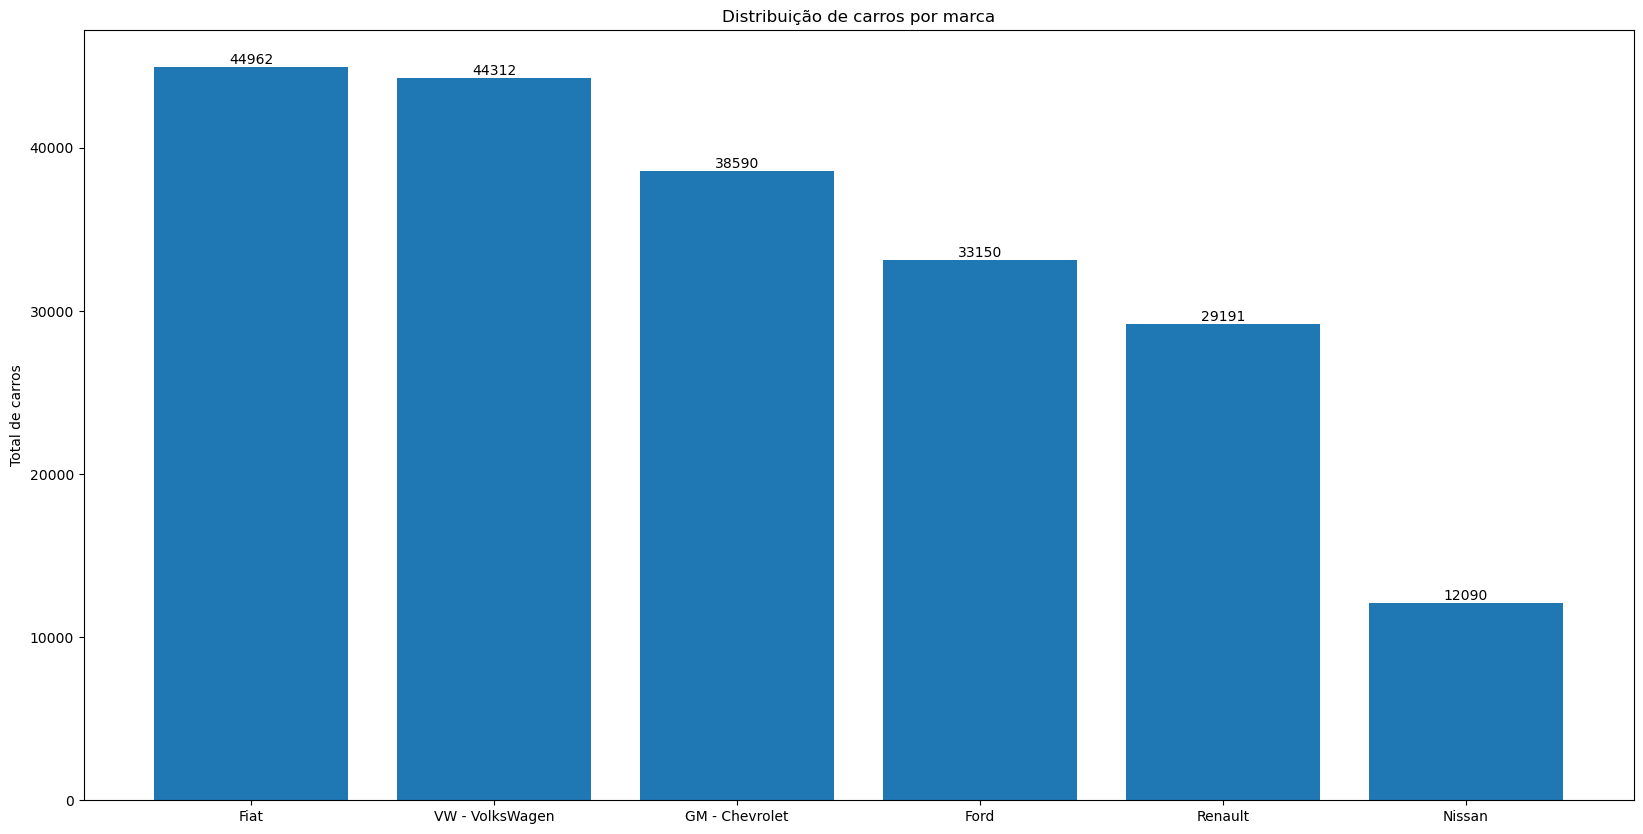

In [222]:
valores_contados_marca = dados['brand'].value_counts()
plt.figure(figsize=(20,10))
grafico_marca = plt.bar(valores_contados_marca.index, valores_contados_marca.values)
plt.title('Distribuição de carros por marca')
plt.ylabel('Total de carros');
plt.bar_label(grafico_marca, size=10);


b. Gere um gráfico da distribuição da quantidade de carros por tipo de engrenagem do
carro

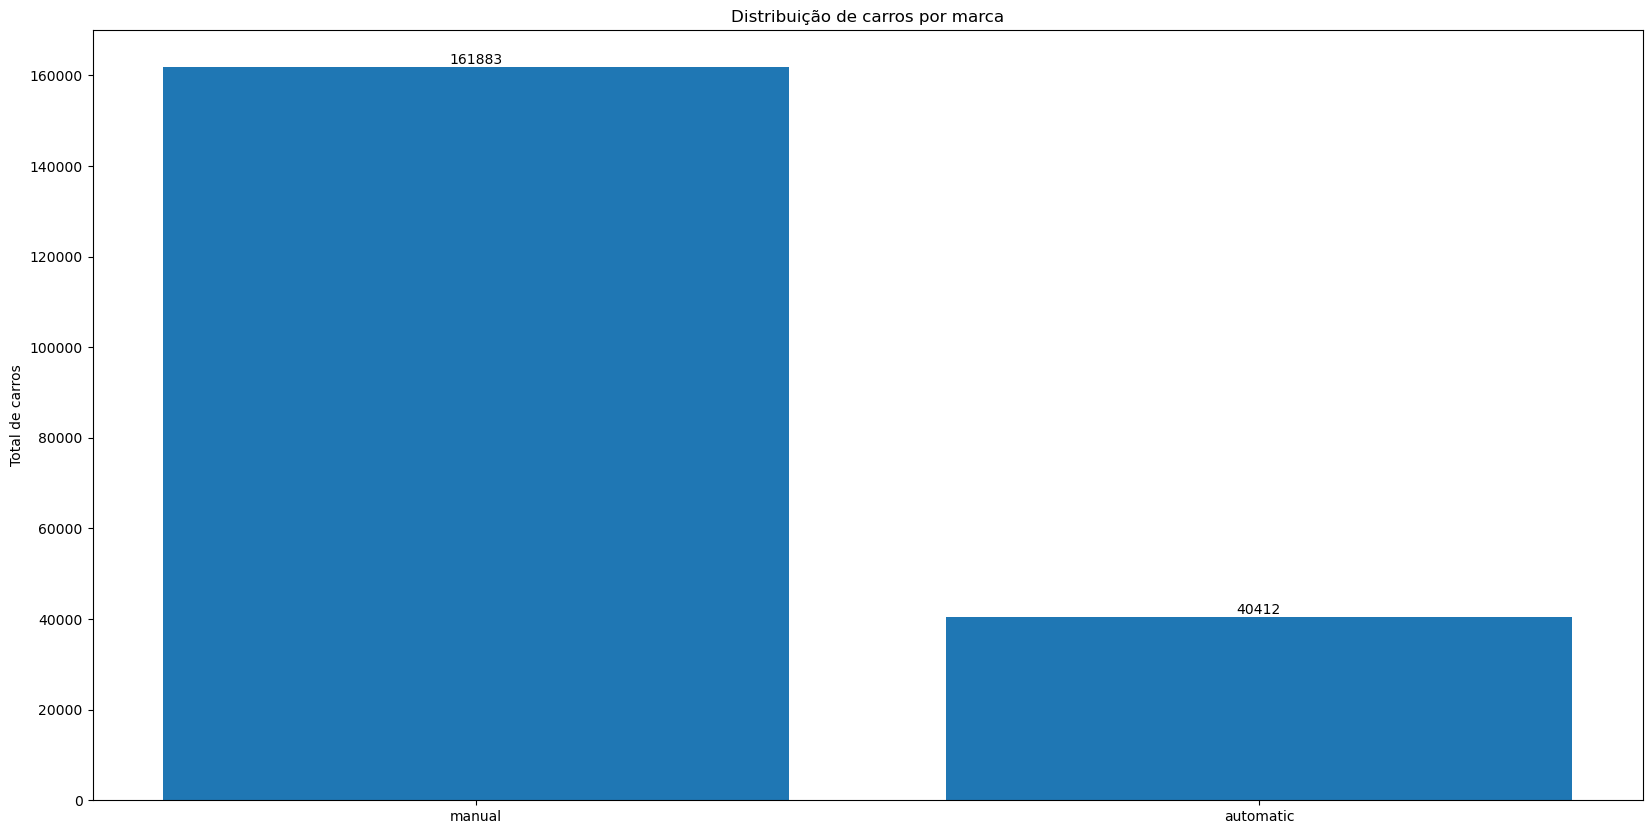

In [223]:
valores_contados_engrenagem = dados['gear'].value_counts()
plt.figure(figsize=(20,10))
grafico_engrenagem_bar = plt.bar(valores_contados_engrenagem.index, valores_contados_engrenagem.values)
plt.title('Distribuição de carros por marca') 
plt.ylabel('Total de carros'); 
plt.bar_label(grafico_engrenagem_bar, size=10);

c. Gere um gráfico da evolução da média de preço dos carros ao longo dos meses de 2022 (variável de tempo no eixo X)

In [224]:
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002,9162.0
1,2021,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001,8832.0
2,2021,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000,8388.0
3,2021,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000,8453.0
4,2021,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001,12525.0


In [225]:
meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dados['month_of_reference'] = pd.Categorical(dados['month_of_reference'], categories=meses, ordered=True)
dados2022 = dados[dados['year_of_reference'] == 2022]
media_preco_mes = dados2022.groupby('month_of_reference')['avg_price_brl'].mean()
media_preco_mes.head(50)

month_of_reference
January      54840.270037
February     55824.519882
March        56848.951914
April        57150.037325
May          57799.763776
June         58065.611398
July         57893.997056
August       57923.544105
September    58198.936989
October      58227.410144
November     58215.626236
December     57997.243992
Name: avg_price_brl, dtype: float64

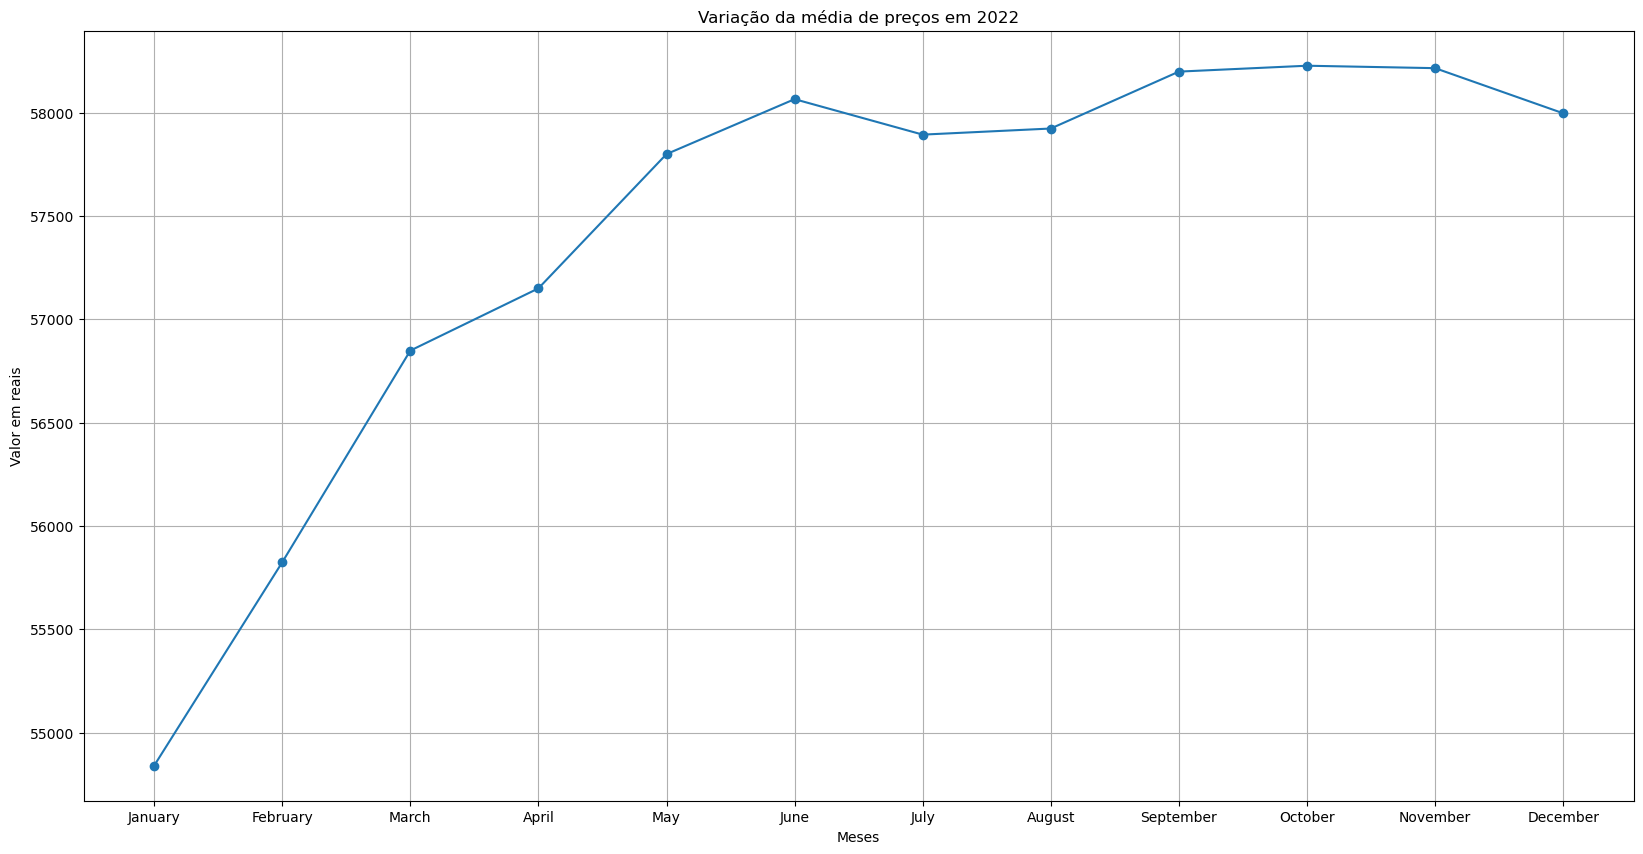

In [226]:
#gráfico de linha
plt.figure(figsize=(20,10))
plt.plot(media_preco_mes.index, media_preco_mes.values, 'o-')
plt.title('Variação da média de preços em 2022') 
plt.ylabel('Valor em reais')
plt.xlabel('Meses')
plt.grid()

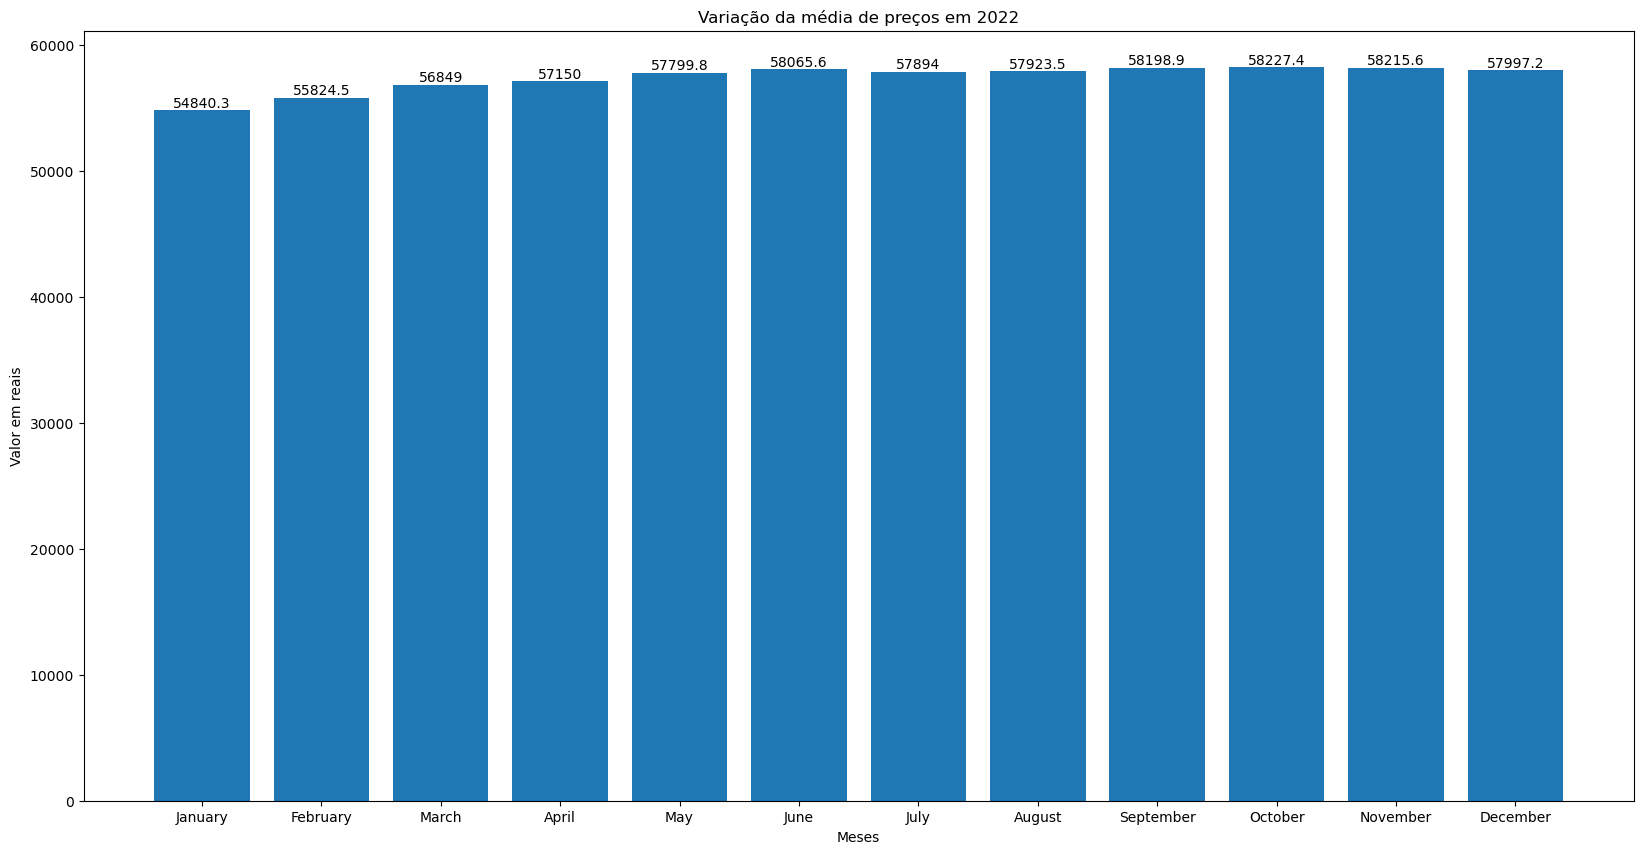

In [227]:
# gráfico de barras
plt.figure(figsize=(20,10))
grafico_mes_bar = plt.bar(media_preco_mes.index, media_preco_mes.values)

plt.title('Variação da média de preços em 2022') 
plt.ylabel('Valor em reais')
plt.xlabel('Meses')
plt.bar_label(grafico_mes_bar);

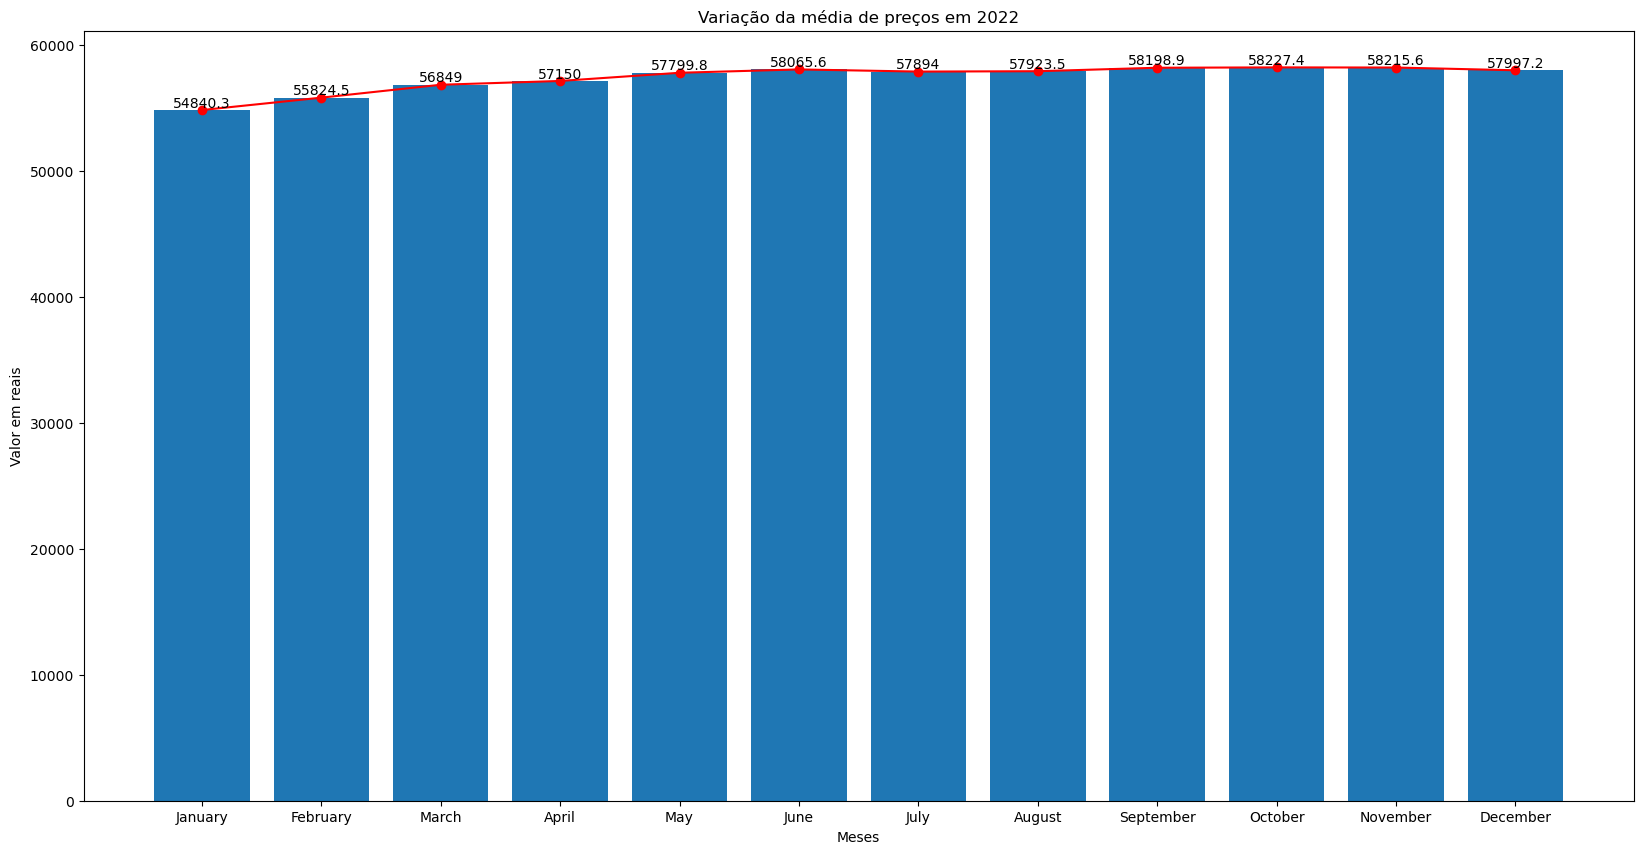

In [228]:
# Barras e linhas juntas
plt.figure(figsize=(20,10))
grafico_mes_bar = plt.bar(media_preco_mes.index, media_preco_mes.values)
plt.plot(media_preco_mes.index, media_preco_mes.values, 'ro-')

plt.title('Variação da média de preços em 2022') 
plt.ylabel('Valor em reais')
plt.xlabel('Meses')
plt.bar_label(grafico_mes_bar);

d. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de
engrenagem

In [229]:
#Agrupa a media por marca e tipo de engrenagem
media_preco_gear_brand = dados2022.groupby(['brand', 'gear'])['avg_price_brl'].mean()
media_preco_gear_brand.head()

brand           gear     
Fiat            automatic    104957.530488
                manual        42557.346072
Ford            automatic     91244.147450
                manual        57684.404623
GM - Chevrolet  automatic     95461.305044
Name: avg_price_brl, dtype: float64

In [230]:
# transforma em type DataFrame para poder montar o grafico
media_preco_gear_brand = media_preco_gear_brand.reset_index(name='Preco medio')
media_preco_gear_brand.head()

,brand,gear,Preco medio
0,Fiat,automatic,104957.530488
1,Fiat,manual,42557.346072
2,Ford,automatic,91244.147450
3,Ford,manual,57684.404623
4,GM - Chevrolet,automatic,95461.305044


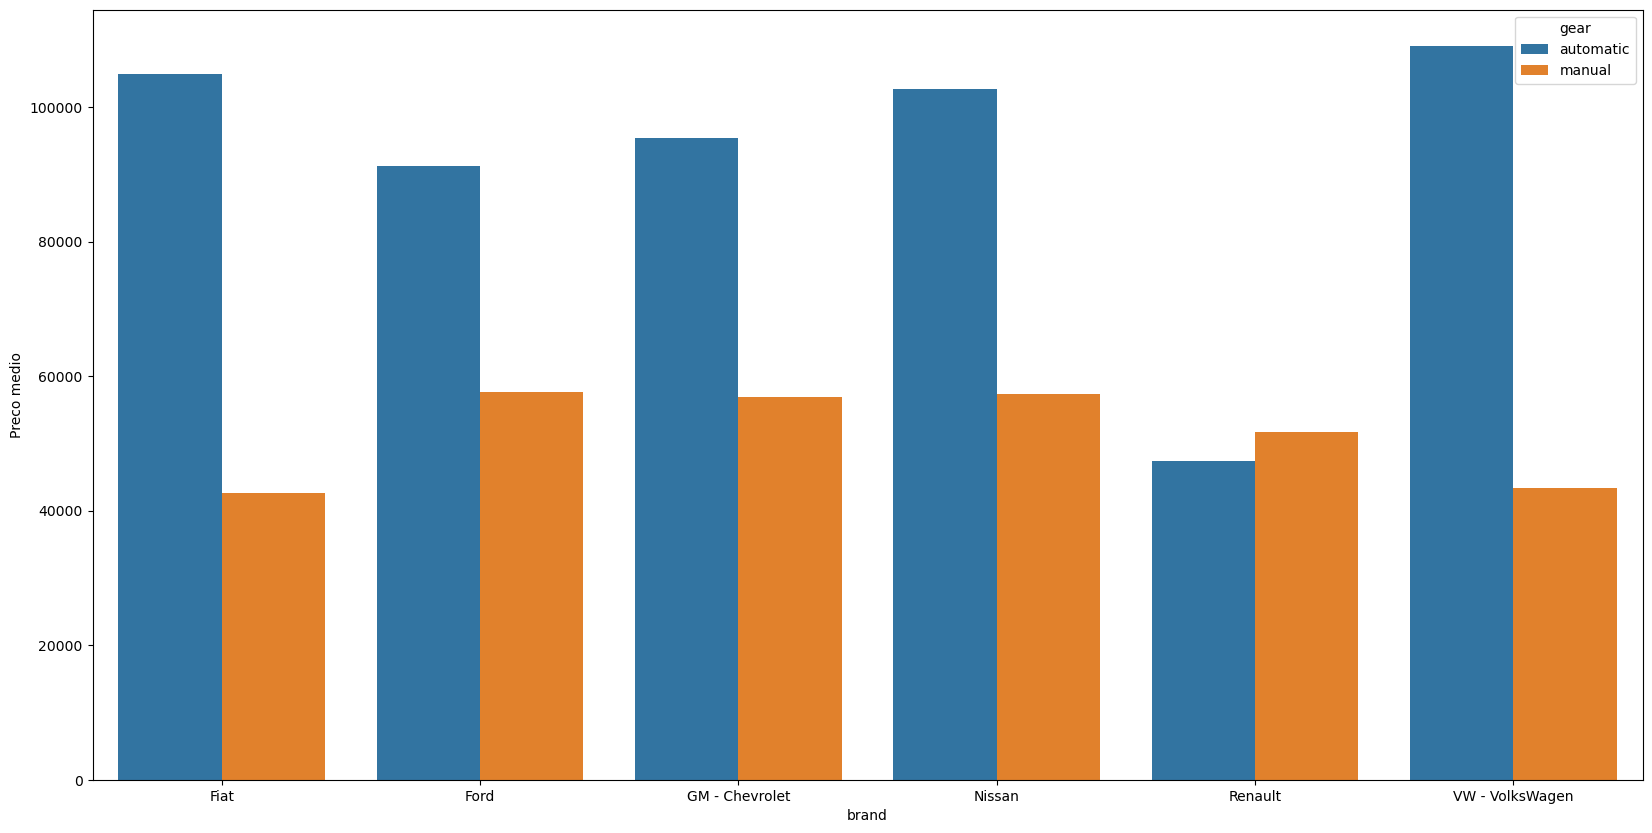

In [231]:
plt.figure(figsize=(20,10))
sns.barplot(x='brand', y='Preco medio', hue='gear', data=media_preco_gear_brand, hue_order=['automatic', 'manual']);

e. Dê uma breve explicação (máximo de quatro linhas) sobre os resultados gerados no
item d

R:  É possível identificar que quase em todas as marcas, o preço médio dos carros automaticos é maio que dos carros manuais, com exceção da renault

f. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de
combustível

In [232]:
#Agrupa a media por marca e tipo de combustível
media_preco_brand_fuel = dados2022.groupby(['brand', 'fuel'])['avg_price_brl'].mean()
media_preco_brand_fuel.head()

brand  fuel    
Fiat   Alcohol      12162.934109
       Diesel      107518.075987
       Gasoline     40060.655304
Ford   Alcohol      10729.083333
       Diesel      106980.133027
Name: avg_price_brl, dtype: float64

In [233]:
# transforma em type DataFrame para poder montar o grafico
media_preco_brand_fuel = media_preco_brand_fuel.reset_index(name='Preco medio')
media_preco_brand_fuel.head()

,brand,fuel,Preco medio
0,Fiat,Alcohol,12162.934109
1,Fiat,Diesel,107518.075987
2,Fiat,Gasoline,40060.655304
3,Ford,Alcohol,10729.083333
4,Ford,Diesel,106980.133027


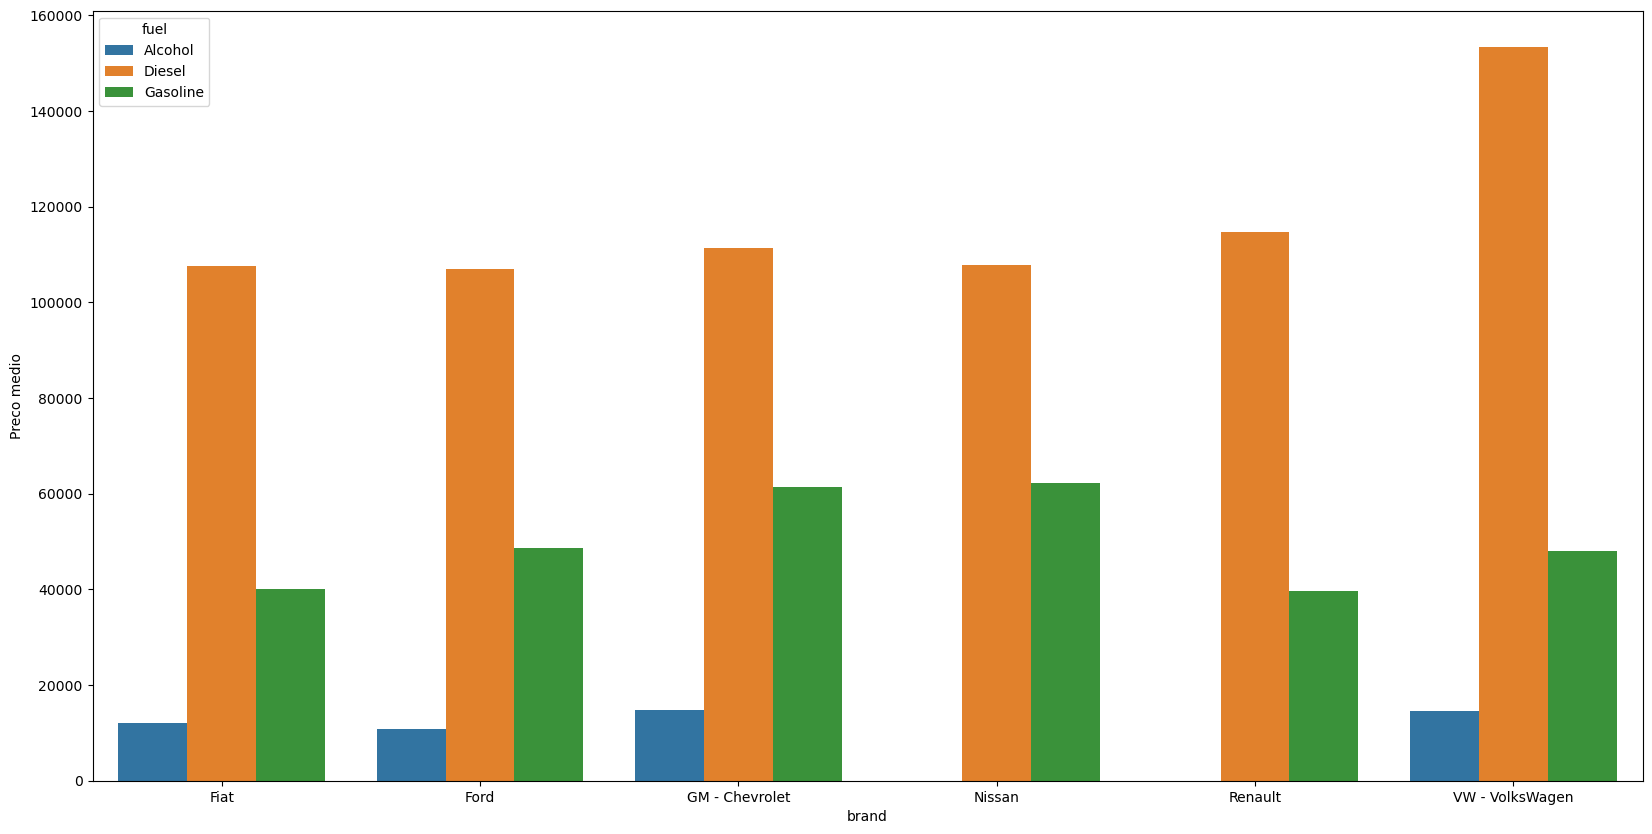

In [234]:
plt.figure(figsize=(20,10))
sns.barplot(x='brand', y='Preco medio', hue='fuel', data=media_preco_brand_fuel, hue_order=['Alcohol', 'Diesel', 'Gasoline']);

g. Dê uma breve explicação (máximo de quatro linhas) sobre os resultados gerados no
item f

R: É possível verificar que para todas as marcas, os automóveis a Diesel são mais caros, seguidos pelos automóveis a Gasolina e por fim alcool

### Aplicação de modelos de ML

a. Escolha as variáveis numéricas (modelos de Regressão) para serem as variáveis
independentes do modelo.A variável target é avg_price. Observação: caso julgue
necessário, faça a transformação de variáveis categóricas em variáveis numéricas para
inputar no modelo. Indique quais variáveis foram transformadas e como foram
transformadas

In [235]:
dados.dtypes

year_of_reference        int64
month_of_reference    category
fipe_code               object
authentication          object
brand                   object
model                   object
fuel                    object
gear                    object
engine_size             object
year_model               int64
avg_price_brl          float64
dtype: object

In [236]:
# mudando a virgula dos valores para ponto, para poder converter os dados para o tipo float
dados['engine_size'] = dados['engine_size'].str.replace(',', '.')
dados['engine_size'] = dados['engine_size'].astype(float)
dados.dtypes
# criando valores numericos para as variaveis categoricas
dados['brand_number'] = LabelEncoder().fit_transform(dados['brand'])
dados['model_number'] = LabelEncoder().fit_transform(dados['model'])
dados['fuel_number'] = LabelEncoder().fit_transform(dados['fuel'])
dados['gear_number'] = LabelEncoder().fit_transform(dados['gear'])
meses_map = {'January': 0, 'February': 1, 'March': 2, 'April': 3, 'May': 4, 'June': 5, 'July': 6, 'August': 7, 'September': 8, 'October': 9, 'November': 10, 'December': 11}
dados['month_of_reference_number'] = dados['month_of_reference'].map(meses_map).astype(int)


In [237]:
dados_numericos = dados.drop(['month_of_reference', 'fipe_code', 'authentication', 'brand', 'model', 'fuel', 'gear' ], axis=1)
dados_numericos.dtypes

year_of_reference              int64
engine_size                  float64
year_model                     int64
avg_price_brl                float64
brand_number                   int64
model_number                   int64
fuel_number                    int64
gear_number                    int64
month_of_reference_number      int64
dtype: object

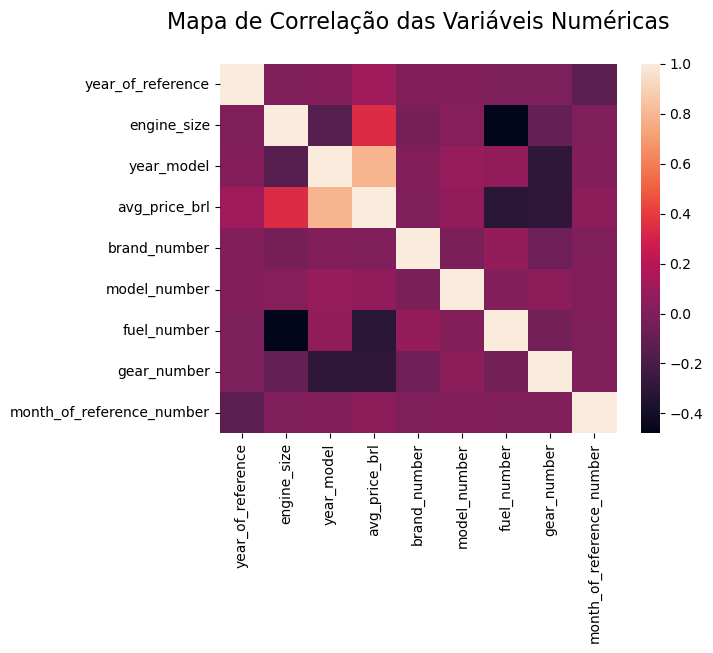

In [238]:
sns.heatmap(dados_numericos.corr("spearman"), annot=False)
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize=16)
plt.show()

In [239]:
variaveis_interesse = dados_numericos.drop('avg_price_brl', axis=1)
variaveis_interesse.head()

,year_of_reference,engine_size,year_model,brand_number,model_number,fuel_number,gear_number,month_of_reference_number
0,2021,1.0,2002,2,297,2,1,0
1,2021,1.0,2001,2,297,2,1,0
2,2021,1.0,2000,2,297,2,1,0
3,2021,1.0,2000,2,297,0,1,0
4,2021,1.6,2001,2,260,2,1,0


In [240]:
variaveis_target = dados_numericos['avg_price_brl']
variaveis_target.head()

0     9162.0
1     8832.0
2     8388.0
3     8453.0
4    12525.0
Name: avg_price_brl, dtype: float64

b. Crie partições contendo 75% dos dados para treino e 25% para teste

In [241]:
# Dividindo os dados nas porcentagens para teste e treino
inte_train, inte_test, targ_train, targ_test = train_test_split(variaveis_interesse, variaveis_target, test_size = 0.25, random_state = 42)
print(inte_train.shape)

(151721, 8)


c. Treine modelos RandomForest (biblioteca RandomForestRegressor) e XGBoost
(biblioteca XGBRegressor) para predição dos preços dos carros. Observação: caso
julgue necessário, mude os parâmetros dos modelos e rode novos modelos. Indique
quais parâmetros foram inputados e indique o treinamento de cada modelo

**Random Forest**

In [242]:
model_rf = RandomForestRegressor()
model_rf.fit(inte_train, targ_train)

RandomForestRegressor()

**XGBooster**

In [243]:
model_xgboost = XGBRegressor()
model_xgboost.fit(inte_train, targ_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

d. Grave os valores preditos em variáveis criadas

**Random Forest**

In [244]:
valores_preditos_rf = model_rf.predict(inte_test)
valores_preditos_rf

array([ 42570.9 ,  11181.44,   9034.77, ..., 105908.44,   9408.79,
        24880.09])

**XGBooster**

In [245]:
valores_preditos_xgboost = model_xgboost.predict(inte_test)
valores_preditos_xgboost

array([ 43368.285 ,  11810.5205,   9877.4375, ..., 112096.94  ,
         9671.168 ,  25115.246 ], dtype=float32)

e. Realize a análise de importância das variáveis para estimar a variável target, para cada modelo treinado


**Random Forest**

In [246]:
model_rf.feature_importances_
feature_importances_rf = pd.DataFrame(model_rf.feature_importances_, index=inte_train.columns, columns=['Importance']).sort_values('Importance', ascending = False)
feature_importances_rf

,Importance
engine_size,0.449617
year_model,0.389685
model_number,0.058565
gear_number,0.033491
fuel_number,0.032583
brand_number,0.017919
year_of_reference,0.012442
month_of_reference_number,0.005699


**XGBooster**

In [247]:
model_xgboost.feature_importances_
feature_importances_xgb = pd.DataFrame(model_xgboost.feature_importances_, index=inte_train.columns, columns=['Importance']).sort_values('Importance', ascending = False)
feature_importances_xgb

,Importance
engine_size,0.450895
fuel_number,0.191030
year_model,0.181412
gear_number,0.093995
brand_number,0.049774
model_number,0.014217
year_of_reference,0.013606
month_of_reference_number,0.005070


f. Dê uma breve explicação (máximo de quatro linhas) sobre os resultados encontrados na análise de importância de variáveis

É possível observar que nos dois modelos o tamanho do motor é o fator mais importante para definir os preços  dos carros. Em contraponto, o mês de referência é que tem menor importância.

g. Escolha o melhor modelo com base nas métricas de avaliação MSE, MAE e R²

**Random Forest**

- **mse**

In [249]:
mse_rf = mean_squared_error(targ_test, valores_preditos_rf)
mse_rf

6309742.463927553

- **mae**

In [250]:
mae_rf = mean_absolute_error(targ_test, valores_preditos_rf)
mae_rf

1180.0385273591708

- **R²**

In [251]:
r2_score(targ_test, valores_preditos_rf)

0.9976554666810377

**XGBooster**

- **mse**

In [252]:
mse_rf = mean_squared_error(targ_test, valores_preditos_xgboost)
mse_rf

17837888.169971284

- **mae**

In [253]:
mae_rf = mean_absolute_error(targ_test, valores_preditos_xgboost)
mae_rf

2712.4143727469586

- **R²**

In [254]:
r2_score(targ_test, valores_preditos_xgboost)

0.9933719128168047

h. Dê uma breve explicação (máximo de quatro linhas) sobre qual modelo gerou o melhor resultado e a métrica de avaliação utilizada


Ambos algoritmos apresentaram alta acurácia para estimar o preço médio dos carros na metrica R². Porém o modelo Random Forest, apresentou menor erro (MSE e MAE) e maior porcentagem (R²)

- R² 
  - rf = 0,9976
  - xgb = 0,9933

- MSE
  - rf = 6309742.463927553
  - xgb = 17837888.169971284
- MAE
  - rf = 1180.0385273591708
  - xgb = 2712.4143727469586